In [1]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/utils.R")


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis



Attaching package: ‘igraph’


The following object is masked from ‘package:class’:

    knn


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




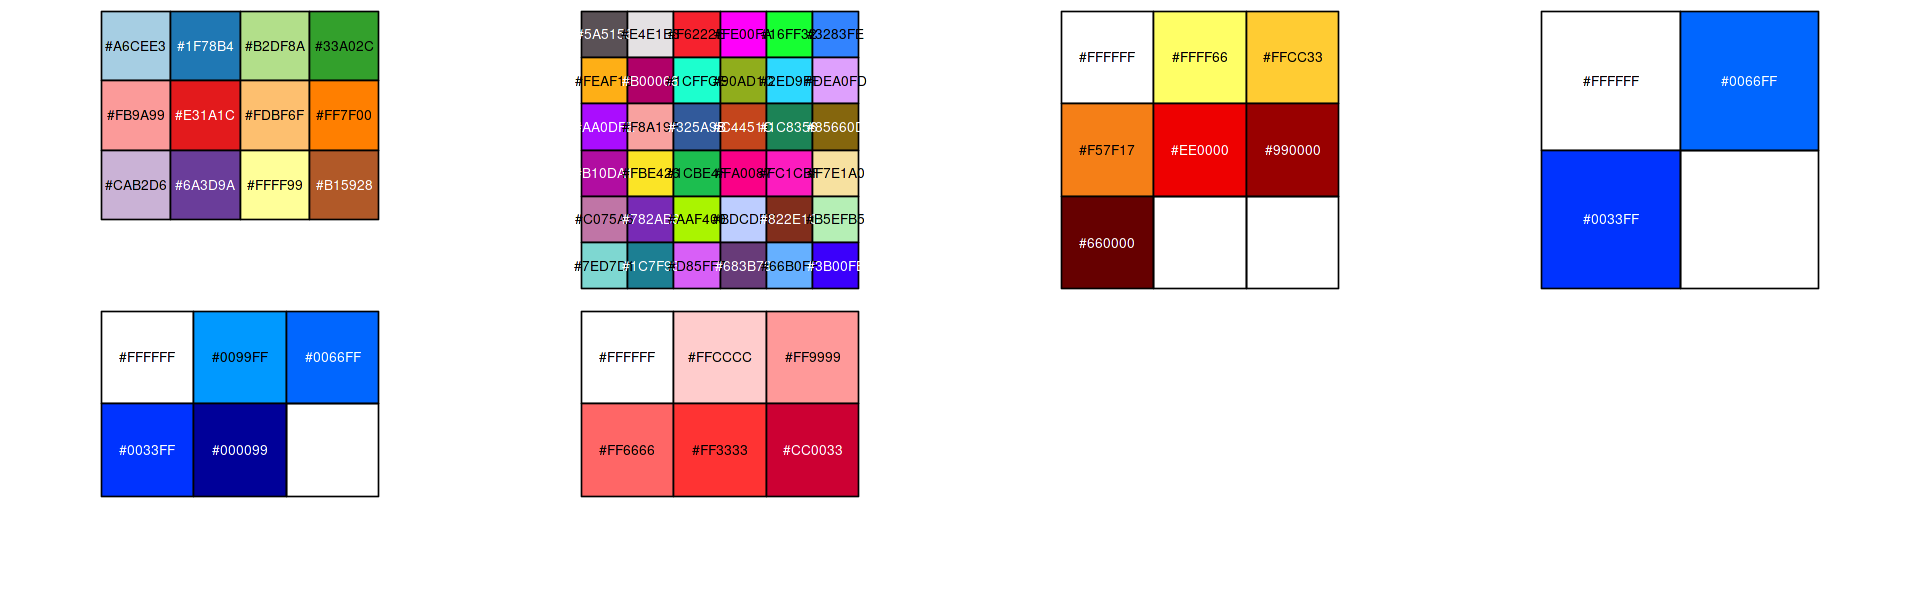

In [2]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [3]:
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line mixing experiment", "human adult atlas subset1", "human adult atlas subset2",  "Buenrostro2018", "Chen2019", "10X PBMC multiomics")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [4]:
# Put meta files of all datasets together
for(j in 1:length(dataset_ls)){
    dataset <- dataset_ls[j]
    k_optimal <- k_ls[j]
    if(j == 1){
        df <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df_metrics <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df$dataset <- dataset_name[j]
        df$dataset2 <- dataset_ls[j]
        df_metrics$dataset <- dataset_name[j]
        df$k_optimal <- k_optimal
        df_metrics$k_optimal <- k_optimal
        df_metrics$dataset2 <- dataset_ls[j]
    }else{
        df1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df1$dataset <- dataset_name[j]
        df1$k_optimal <- k_optimal
        df1$dataset2 <- dataset_ls[j]
        
        df <- rbind(df, df1)
        df_metrics1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df_metrics1$dataset <- dataset_name[j]
        df_metrics1$k_optimal <- k_optimal
        df_metrics1$dataset2 <- dataset_ls[j]
        df_metrics <- rbind(df_metrics, df_metrics1)
    }
}

mapping <- list("Cell line mixing experiment" = "Cell line", 
                     "human adult atlas subset1" = "Atlas1", 
                     "human adult atlas subset2" = "Atlas2",
                     "Buenrostro2018" = "Buenrostro2018",
                     "Chen2019" = "Chen2019",
                     "10X PBMC multiomics" = "10XPBMC")
mapping2 <- list("Cell line mixing experiment" = "1", 
                     "human adult atlas subset1" = "1", 
                     "human adult atlas subset2" = "1",
                     "Buenrostro2018" = "2",
                     "Chen2019" = "2",
                     "10X PBMC multiomics" = "2")
df <- df %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
df <- df %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[as.character(dataset)]))

df$dataset_short <- factor(df$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

df_metrics <- df_metrics %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
df_metrics <- df_metrics %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[as.character(dataset)]))

df_metrics$dataset_short <- factor(df_metrics$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

In [5]:
head(df)

,file,scenario,workflow,method,feature_type,tile_size,distance,ndim,filename,resolution,rds_file,clustering_file,long_method,snn_file,n_clusters,dataset,dataset2,k_optimal,dataset_short,dataset_type
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<fct>,<named list>
1,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
2,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.1_metrics.tsv,0.10,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.1.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,11,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
3,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.15_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.15_metrics.tsv,0.15,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.15_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.15.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,11,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
4,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.2_metrics.tsv,0.20,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.2.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,12,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
5,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.25_metrics.tsv,0.25,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.25.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,12,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
6,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.3_metrics.tsv,0.30,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.3.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,12,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1


In [5]:
df_minimal <- df[!duplicated(df[c("scenario", "long_method")]), ]
dim(df_minimal)

[1] 48 20

In [36]:
head(df_minimal)

,file,scenario,workflow,method,feature_type,tile_size,distance,ndim,filename,resolution,rds_file,clustering_file,long_method,snn_file,n_clusters,dataset,dataset2,k_optimal,dataset_short,dataset_type
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<fct>,<named list>
1,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
33,Cell_line_mixing/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,all_cell_peaks,0,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/all_cell_peaks/0/default/15/r0.05.tsv,Signac_all_cell_peaks,Cell_line_mixing/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
65,Cell_line_mixing/evaluation/ArchR/tiles/500/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,ArchR,tiles,500,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/ArchR/tiles/500/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/ArchR/tiles/500/default/15/r0.05.tsv,ArchR_tiles,Cell_line_mixing/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
97,Cell_line_mixing/evaluation/ArchR/peaks/500/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,ArchR,peaks,500,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/ArchR/peaks/500/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/ArchR/peaks/500/default/15/r0.05.tsv,ArchR_peaks,Cell_line_mixing/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
129,Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,SnapATAC1,default,5000,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.05.tsv,SnapATAC1,Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1
161,Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,aggregation,default,500,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/aggregation/default/500/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/aggregation/default/500/default/15/r0.05.tsv,aggregation,Cell_line_mixing/clustering/aggregation/default/500/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10,Cell line,1


In [6]:
i <- 1
sobj <- readRDS(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/",df_minimal$dataset2[i], "/", df_minimal$snn_file[i]))

In [7]:
embed <- Embeddings(Reductions(sobj, "learned_embedding"))
counts <- sobj[[paste0("nCount_", "all_cell_peaks")]]

Loading required package: Signac



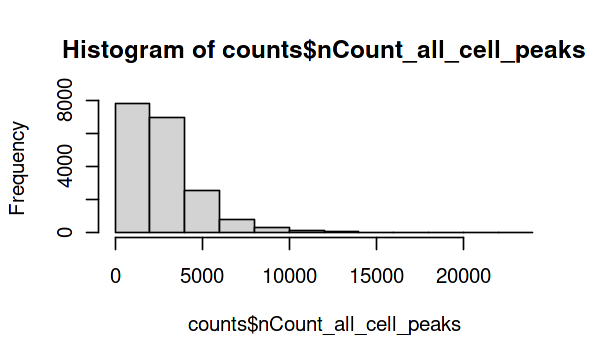

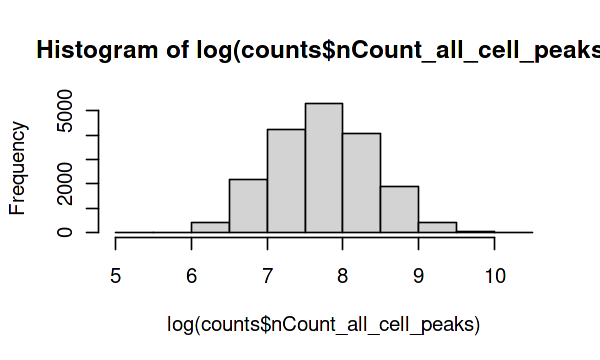

In [27]:
options(repr.plot.width=5, repr.plot.height=3)
hist(counts$nCount_all_cell_peaks)
hist(log(counts$nCount_all_cell_peaks))

In [91]:
depth.cor <- as.data.frame(cor(x = embed, y = counts))

In [93]:
dim(depth.cor)
depth.cor

[1] 14  1

,nCount_all_cell_peaks
,<dbl>
LSI_1,0.003956909
LSI_2,0.138767426
LSI_3,-0.054441045
LSI_4,0.130359688
LSI_5,0.033004276
LSI_6,0.136919114
LSI_7,-0.094425519
LSI_8,-0.036627479
LSI_9,0.043481978


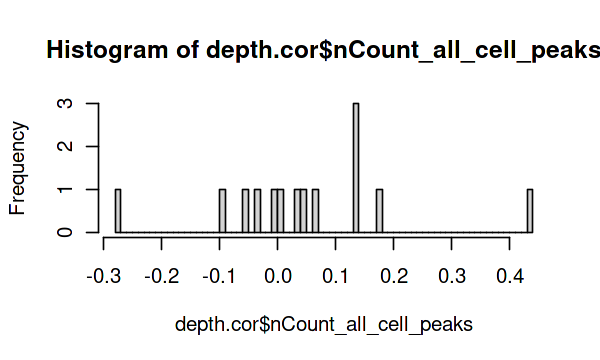

In [34]:
hist(depth.cor$nCount_all_cell_peaks, breaks=100)

In [100]:
dim(embed)

[1] 18538    14

In [ ]:
cor.test(embed[,5], counts$nCount_all_cell_peaks)$p.value


In [109]:
significant_latent_frac <- function(embed, counts_vec, p_th=0.05, add_one=FALSE){
    ndim <- dim(embed)[2]
    n <- 0
    for(i in 1:ndim){
        p <- cor.test(embed[,i], counts_vec)$p.value
        if (p <= p_th){ n <- n + 1}
    }
    if(add_one){
        n <- n + 1
        ndim <- ndim + 1
        }
    return(n/ndim)
}

In [111]:
significant_latent_frac(embed, log(counts$nCount_all_cell_peaks))

[1] 0.8571429

In [39]:
knn_res <- RANN::nn2(embed, k=20)
knn_dist <- knn_res$nn.dists
knn_idx <- knn_res$nn.idx

In [64]:
head(knn_dist)

0,0.6190948,0.6343265,0.7208799,0.7307849,0.7698762,0.7814074,0.8059825,0.8257945,0.8266515,0.8416677,0.8485359,0.8617609,0.8646539,0.8693503,0.8755938,0.8868308,0.8940318,0.9049685,0.9089847
0,1.4689550,1.6526272,1.7684713,2.0150225,2.0503470,2.0793549,2.0871507,2.1050540,2.1199039,2.1471523,2.1565602,2.2229182,2.2356338,2.2362881,2.2619888,2.2665974,2.2934857,2.2961884,2.3035594
0,0.6477913,0.6689236,0.7086787,0.7154599,0.7581968,0.8086411,0.8107834,0.8149622,0.8215282,0.8572701,0.8579066,0.8813162,0.8856129,0.8872472,0.8943933,0.8954579,0.8967830,0.9040714,0.9056651
0,0.6394627,0.6708736,0.7134767,0.7179755,0.7181504,0.7408846,0.7675817,0.7728859,0.7761221,0.7795534,0.7799549,0.8099346,0.8336740,0.8599256,0.8814461,0.8829723,0.8953765,0.8997577,0.9056759
0,0.6819041,0.7115550,0.8147616,0.8309620,0.8426925,0.8487747,0.8762199,0.8791216,0.8848501,0.8920181,0.8948140,0.9040034,0.9097619,0.9154677,0.9278536,0.9359042,0.9415929,0.9459349,0.9462608
0,1.0335807,1.5190120,1.5373257,1.5930006,1.6291354,1.6352487,1.6539384,1.7377962,1.7384012,1.8424000,1.8641486,1.8685493,1.8982680,1.9029398,1.9218905,1.9265186,1.9513578,1.9817118,2.0211138


In [65]:
head(knn_idx)

1,9312,11914,9076,13339,447,16817,2841,5712,11874,607,4297,1478,3444,3386,13839,501,15616,6219,7157
2,368,808,10709,5018,976,7674,10402,11546,8066,8518,14959,8505,10680,1262,1625,7752,16182,2176,1832
3,351,7782,3775,4541,1217,13535,2074,11174,4898,1685,14040,3536,10256,10712,12611,8952,2065,7804,1537
4,14070,13268,12311,16244,9283,9571,5967,5601,9008,13601,12989,13832,8388,11662,14129,15276,4997,7994,14903
5,14060,15430,7938,1523,8154,15596,16931,3671,16712,2939,8812,8760,13685,13980,13554,786,2366,15492,12650
6,800,1875,4625,4948,997,5573,5320,661,3953,1352,2738,6249,6384,1017,730,2844,2762,1244,3762


In [67]:
dim(knn_idx)

[1] 18538    20

In [71]:
c(t(knn_idx))[21]

[1] 2

In [74]:
matrix_a <- c(1:9)
matrix_b <- c(1:9)
matrix_a
matrix_b

[1] 1 2 3 4 5 6 7 8 9

[1] 1 2 3 4 5 6 7 8 9

In [79]:
sum(matrix_a * matrix_b)

[1] 285

In [8]:
g <- sobj@graphs[["snn_ndim15"]]
class(g)
sim_graph_adj <- uwot::similarity_graph(embed, n_neighbors = 10)
colnames(sim_graph_adj) <- colnames(g)
rownames(sim_graph_adj) <- rownames(g)
sobj@graphs[[paste0("umap_graph_k",10)]] <- as.Graph(sim_graph_adj)

[1] "Graph"
attr(,"package")
[1] "SeuratObject"

In [112]:
names(sobj)

[1] "all_cell_peaks"     "nn_ndim15"          "snn_ndim15"        
[4] "umap_graph_k10"     "lsi_all_cell_peaks" "learned_embedding" 
[7] "umap"

In [114]:
a <- c(names(sobj), "snn_ndim20")

In [116]:
a[startsWith(a, "snn_ndim")][1]

[1] "snn_ndim15"

In [117]:
names(sobj)[startsWith(names(sobj), "snn_ndim")][1]

[1] "snn_ndim15"

In [11]:
sum(colnames(sim_graph_adj) == rownames(sim_graph_adj))

[1] 18538

In [9]:
class(sim_graph_adj)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [19]:
dim(g)

[1] 18538 18538

In [21]:
i <- c(1,3,5); j <- c(1,3,4); x <- 1:3
A <- Matrix::sparseMatrix(i, j, x = x)

In [22]:
A

5 x 4 sparse Matrix of class "dgCMatrix"
            
[1,] 1 . . .
[2,] . . . .
[3,] . . 2 .
[4,] . . . .
[5,] . . . 3

In [26]:
B <- as (A, "TsparseMatrix")
str(B)

Formal class 'dgTMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:3] 0 2 4
  ..@ j       : int [1:3] 0 2 3
  ..@ Dim     : int [1:2] 5 4
  ..@ Dimnames:List of 2
  .. ..$ : NULL
  .. ..$ : NULL
  ..@ x       : num [1:3] 1 2 3
  ..@ factors : list()


In [31]:
B <- as (g, "TsparseMatrix")
str(B)

Formal class 'dgTMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:1162292] 0 280 500 648 677 1763 1840 2121 2202 2324 ...
  ..@ j       : int [1:1162292] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ Dim     : int [1:2] 18538 18538
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:18538] "CellLine_HighLoading+AACAAAGTCATCGCAA-1" "CellLine_HighLoading+TTAGGTGGTCGGCTGT-1" "CellLine_HighLoading+TCAAGCACAAGGGTAC-1" "CellLine_HighLoading+TAAGCCAGTCCAACCG-1" ...
  .. ..$ : chr [1:18538] "CellLine_HighLoading+AACAAAGTCATCGCAA-1" "CellLine_HighLoading+TTAGGTGGTCGGCTGT-1" "CellLine_HighLoading+TCAAGCACAAGGGTAC-1" "CellLine_HighLoading+TAAGCCAGTCCAACCG-1" ...
  ..@ x       : num [1:1162292] 1 0.0811 0.4286 0.1111 0.1111 ...
  ..@ factors : list()


In [ ]:
B@Dimnames[1]

In [58]:
B@Dimnames[[1]][B@i+1]

[1] "CellLine_HighLoading+AACAAAGTCATCGCAA-1"
 [2] "CellLine_LowLoading+TTTGTGTAGGGTTCCC-1" 
 [3] "CellLine_LowLoading+CCTGCTAAGAACTAAC-1" 
 [4] "CellLine_HighLoading+AGCTGATTCACCACAA-1"
 [5] "CellLine_LowLoading+TTCGATTCAATGGCTT-1" 
 [6] "CellLine_HighLoading+AGCCGCATCGTCCCTA-1"
 [7] "CellLine_HighLoading+CGCACAGTCAGCACGC-1"
 [8] "CellLine_LowLoading+CACCTTGAGTGTCACT-1" 
 [9] "CellLine_LowLoading+TTCATTGCAGTAGTCT-1" 
[10] "CellLine_LowLoading+CTTGCTGTCTCTGACC-1"

In [63]:
head(counts)

,nCount_all_cell_peaks
,<dbl>
CellLine_HighLoading+AACAAAGTCATCGCAA-1,3401
CellLine_HighLoading+TTAGGTGGTCGGCTGT-1,7097
CellLine_HighLoading+TCAAGCACAAGGGTAC-1,3634
CellLine_HighLoading+TAAGCCAGTCCAACCG-1,1852
CellLine_HighLoading+AACTGGTTCATCATGG-1,2636
CellLine_LowLoading+GGGACCTCACCTGGTG-1,6781


In [75]:
# graph: adjacency matrix
# score: dataframe
geary_c <- function(score, col, embed=NULL, graph=NULL, k=30){
    if (is.null(embed) & is.null(graph)){stop("Either an input matrix or an input graph is required.")}
    if (is.null(graph)){
        knn_res <- RANN::nn2(embed, k=k)
        dist <- knn_res$nn.dists
        knn_idx <- knn_res$nn.idx
        idx1 <- rep(knn_idx[,1],each=k)
        idx2 <- c(t(knn_idx))
        numer <- (dim(dist)[1] - 1) * sum(dist * ((score[idx1, col] - score[idx2, col]) ** 2))
    } else {
        require(Matrix)
        graph <- as(graph, "TsparseMatrix")
        dist <- graph@x
        idx1 <- graph@Dimnames[[1]][graph@i+1]
        idx2 <- graph@Dimnames[[1]][graph@j+1]
        numer <- (length(dist) - 1) * sum(dist * ((score[idx1, col] - score[idx2, col]) ** 2))
    }
    
    denom <- 2 * sum(dist) * sum((score[,col] - mean(score[,col])) ** 2)
    return(numer / denom)
}


In [120]:
log(geary_c(log(counts), "nCount_all_cell_peaks", embed=embed))

[1] -2.470444

In [121]:
log(geary_c(log(counts), "nCount_all_cell_peaks", embed=NULL, graph=g))

[1] 1.255762

In [119]:
log(geary_c(log(counts), "nCount_all_cell_peaks", embed=NULL, graph=sim_graph_adj))

[1] -0.1918285

In [79]:
head(log(counts))

,nCount_all_cell_peaks
,<dbl>
CellLine_HighLoading+AACAAAGTCATCGCAA-1,8.131825
CellLine_HighLoading+TTAGGTGGTCGGCTGT-1,8.867427
CellLine_HighLoading+TCAAGCACAAGGGTAC-1,8.198089
CellLine_HighLoading+TAAGCCAGTCCAACCG-1,7.524021
CellLine_HighLoading+AACTGGTTCATCATGG-1,7.877018
CellLine_LowLoading+GGGACCTCACCTGGTG-1,8.821880


In [68]:
        graph <- as(g, "TsparseMatrix")
        dist <- graph@x
        idx1 <- graph@Dimnames[[1]][graph@i+1]
        idx2 <- graph@Dimnames[[1]][graph@j+1]

In [71]:
idx1[1:10]

[1] "CellLine_HighLoading+AACAAAGTCATCGCAA-1"
 [2] "CellLine_LowLoading+TTTGTGTAGGGTTCCC-1" 
 [3] "CellLine_LowLoading+CCTGCTAAGAACTAAC-1" 
 [4] "CellLine_HighLoading+AGCTGATTCACCACAA-1"
 [5] "CellLine_LowLoading+TTCGATTCAATGGCTT-1" 
 [6] "CellLine_HighLoading+AGCCGCATCGTCCCTA-1"
 [7] "CellLine_HighLoading+CGCACAGTCAGCACGC-1"
 [8] "CellLine_LowLoading+CACCTTGAGTGTCACT-1" 
 [9] "CellLine_LowLoading+TTCATTGCAGTAGTCT-1" 
[10] "CellLine_LowLoading+CTTGCTGTCTCTGACC-1"

In [72]:
numer <- (dim(dist)[1] - 1) * sum(dist * ((counts[idx1, "nCount_all_cell_peaks"] - counts[idx2, "nCount_all_cell_peaks"]) ** 2))
numer

numeric(0)

In [74]:
length(dist)

[1] 1162292

In [122]:
list1 <- list(1, 2, 3)
list2 <- list("a", "b", "c")

In [127]:
counts[,"nCount_all_cell_peaks"]

[1]  3401  7097  3634  1852  2636  6781  3576  1834  2331  2480  2736  2810
   [13]  1295  4228 11896  2525  2336  2714  5654  9172  6624  5651  4624  2564
   [25] 10792  8725  6652  6077  2956  1327  6471  5983  4377  3039  4952  6406
   [37]  4707  4915  3645  8439  3078  8675 12837  3069  2039   993  2937  8524
   [49]  1519  3301  4528  1500  4936  1728  2038  6381  5321  8788  1966  1562
   [61]  5559   815  3343  3081  3085  4868  2995  1485  5663  5039  1289  2470
   [73]  2510  3091  4232  8261  6112  3588  3439  1691  4135  1811  1283  2655
   [85]  6237  3065  4430  3197  3283  1902  3245  3393  3700  6251  1937  1912
   [97]  6155  9414  3947   937  7660  2458  2496   710  5176  1443  9512  3950
  [109]  2903  3746  3273  4647  3067  6592  4795  6084  8653  6076  3507  2943
  [121]  5740  2738   973  3299  3881  4234  4440  1618  2480  4896  6094  3511
  [133]   782  2554  1619  2140  5508  5546  3783  5386  6654  4888  2191  4492
  [145]  2824 14564  5407  5536  1217  2165  6071  2098  8562  5759  3562  4641
  [157]  4800  6244  2467  4171  1496  2021  3895  9305  4759  3637  5507  3862
  [169]  8050  2509  1602  1599  3291  4548  2120  4795  8309  6517  4759   866
  [181]  1786  6490  8410  3164  5013  4958   901  4540  7562  4647  3173  3665
  [193]  2820  8104  5365  5846  2769  1492  3614  1972  1706  3177   925  2570
  [205]  1329 14818  4770  2558  2199  3728  7491  3498  6122  1195  4111  4414
  [217]  2258  3412  2122  3702  4244  7423  5866  3559  3292  1620  3075  4249
  [229]  5575  4884  2979  2451  9767  3377  1159  2966  2368  7437  2037  3089
  [241]  6114  1744  2857  3580  6881  5099  5074  4925  2149  4330  6371  3438
  [253]   976  1434  2925  4211  2449  1240  8570  3514  4701  2490  6623  3363
  [265]  5539  4165  3491  2771  3535  4659  3334  7435  2356  2238  1896  9798
  [277]  2883  3302  3767  9445  2602  1783  4540  4041  3663  6218  3789  9025
  [289]  3017  4819  1642  6554  2874  2696  3723  2176  3423  3971  2847  2811
  [301]  4292  1092  2124  7432  4192  6478  1292  2505  5252  2302  8989  2243
  [313]  5355  6252  2873  2714  2603  3572  2668  3474  2417  6996  8763  2738
  [325]  2193  3213  1989  7469  3526  2034  1847  1040  5223  2347  2449  1054
  [337]  3098  3808  5069  8717  1274  6972  5706  1448  2110  8821  4774  5189
  [349] 11310  3462  3864  1646 10448  5217  1269  1945  3671  5742  1457  5242
  [361]  2786  2462  4366  4794  1627  6681  3494 10290  3071  3004  3813  3833
  [373]  2722  1979  2225  2614  2045  2887  1936  5069  5172  2920  3846  3766
  [385]  5090  2500  5258  4255  8973  1829  2456  4628  1614  1576  7150  2135
  [397]  2726  1445  5736  2979  1521  4617  7696  4128  6130  6805  2462  6983
  [409]  8846  1489  4891  2935  6818  1581  2235  2568  1734  1767  2738  3400
  [421]  3334  2428  2713  1204  2537  6607  5128  1325  4313  2109  3473  2685
  [433]  5530  3930  2966  3348 10694  2831  3830  2535  1420  3977   807  3444
  [445]  2115  4061  2175  2169  4597  3117  3116 12692  5300 10476  2680   970
  [457]  1643  4211  3116  5683  1700  1774  5385  4454  2729  3117  8135  7051
  [469]  3247  1804  2553  3893  4041  7656   772  4382  2981  5207  5912   625
  [481]  2786  4618  2267   935  3230  8224  4602  1924  2126  5134  2550  4610
  [493]  3677  7840  2025  1327  5828  3786  4423  1872  2846  3560  9376  3364
  [505]  3016  4296  4485  4960  4272  3413  5123  2056  4577  5350  2842  2743
  [517]  1502  2167  3331  4943  1113  7390  1998  1446  3554  5500  8402  1512
  [529]  4374  3581  4709  1408  1467   994  4042 10089  8618  2273  2557  3830
  [541]  4034  8307  3559  1996  4793 14188  4903  1760  8159  4890  2287  1856
  [553]  9028  3010  4746  7979  5608  3239  7511  4183  3918  2349  8292  9561
  [565]  7795  4737  3312  4857  2877  1535  3918  2489  4997  9190  1833  3584
  [577]  7230  6125  2792  4161  2335  2957  2980  1938  3312  2381  4171  1831
  [589]  2766  5770  2901 14553  5819  1167  1318  5611 11327  6147  7399  4909
  [6